In [1]:
import pandas as pd
import numpy as np
import os
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
os.getcwd()

'c:\\Users\\zhuja\\OneDrive\\Desktop\\cmpe-351-group-1\\src'

In [3]:
os.chdir("c:/Users/zhuja/OneDrive/Desktop/cmpe-351-group-1")

In [4]:
crypto_dict = {
    "bitcoin":"btc",
    "avalanche":"avax",
    "doge":"doge",
    "ethereum":"eth",
    "solana":"sol"
}

In [5]:
def get_SV_data(crypto):
    twitter_df = pd.read_csv(f'data/processed/twitter/{crypto}_sentiment.csv')
    bit_prices = pd.read_csv(f'data/raw/crypto/{crypto_dict[crypto]}_2022_03_05-2022_03_11_minute.csv')
    bit_prices["time"] = pd.to_datetime(bit_prices['time'],unit='s')
    price_dict = bit_prices.set_index("time")["open"].to_dict()
    twitter_df["created_at"] = twitter_df["created_at"].apply(lambda x: pd.to_datetime(x[:-6]))
    twitter_df["created_at"] = twitter_df["created_at"].apply(lambda x: x.replace(second=0))
    twitter_df["future_date"] = twitter_df["created_at"].apply(lambda x: x+timedelta(hours=1))
    twitter_df = twitter_df[twitter_df["future_date"].isin(bit_prices["time"])] ##Filter out dates for which we don't have price data
    twitter_df["price"] = twitter_df["created_at"].apply(lambda x: price_dict[x])
    twitter_df["future_price"] = twitter_df["created_at"].apply(lambda x: price_dict[x+timedelta(hours=1)])
    sent = twitter_df["vader_sentiment_compound"]
    d_price = (twitter_df["future_price"]-twitter_df["price"])/twitter_df["price"]
    return sent, d_price

r2 value:  0.04986138491033176
slope:  0.009338353252090469


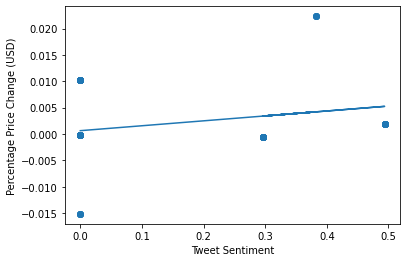

In [6]:
sent,d_price=get_SV_data("avalanche")
plt.scatter(sent,d_price)

m, b = np.polyfit(sent, d_price, 1)
plt.plot(sent, m*sent + b)

plt.xlabel("Tweet Sentiment")
plt.ylabel("Percentage Price Change (USD)")

r2 = r2_score(d_price, m*sent + b)
print("r2 value: ",r2)
print("slope: ",m)

In [7]:
from SALib.analyze import sobol
sensitivity = sobol.analyze(sent, d_price)
print(sensitivity)

ModuleNotFoundError: No module named 'SALib'

r2 value:  0.0377140385326562
slope:  0.004474819341968226


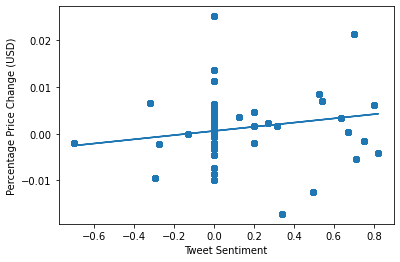

In [ ]:
sent,d_price=get_SV_data("bitcoin")
plt.scatter(sent,d_price)

m, b = np.polyfit(sent, d_price, 1)
plt.plot(sent, m*sent + b)

plt.xlabel("Tweet Sentiment")
plt.ylabel("Percentage Price Change (USD)")

r2 = r2_score(d_price, m*sent + b)
print("r2 value: ",r2)
print("slope: ",m)

r2 value:  0.05543829647694554
slope:  0.006236567194672392


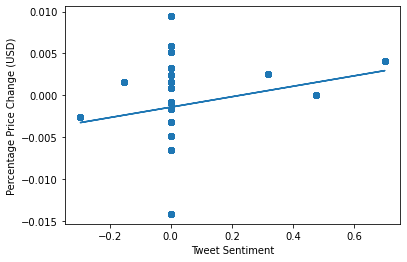

In [ ]:
sent,d_price=get_SV_data("doge")
plt.scatter(sent,d_price)

m, b = np.polyfit(sent, d_price, 1)
plt.plot(sent, m*sent + b)

plt.xlabel("Tweet Sentiment")
plt.ylabel("Percentage Price Change (USD)")

r2 = r2_score(d_price, m*sent + b)
print("r2 value: ",r2)
print("slope: ",m)

r2 value:  0.11115114534766324
slope:  0.011610387152357774


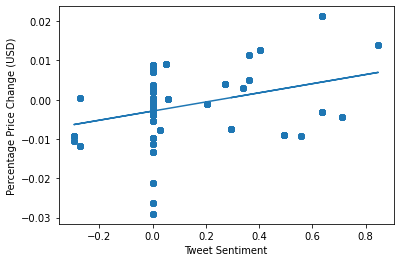

In [ ]:
sent,d_price=get_SV_data("ethereum")
plt.scatter(sent,d_price)

m, b = np.polyfit(sent, d_price, 1)
plt.plot(sent, m*sent + b)

plt.xlabel("Tweet Sentiment")
plt.ylabel("Percentage Price Change (USD)")

r2 = r2_score(d_price, m*sent + b)
print("r2 value: ",r2)
print("slope: ",m)

r2 value:  0.001685882627794788
slope:  0.0014735710911045787


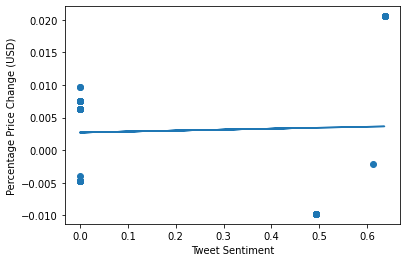

In [ ]:
sent,d_price=get_SV_data("solana")
plt.scatter(sent,d_price)

m, b = np.polyfit(sent, d_price, 1)
plt.plot(sent, m*sent + b)

plt.xlabel("Tweet Sentiment")
plt.ylabel("Percentage Price Change (USD)")

r2 = r2_score(d_price, m*sent + b)
print("r2 value: ",r2)
print("slope: ",m)